In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy import stats
# from IPython.display import display, HTML
# import statsmodels.api as sm

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 200  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

# Set Style
plt.style.use('fivethirtyeight')

In [7]:
def p2f(x):
    return float(x.strip('%'))/100

dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')

df = pd.read_csv("accepted_2007_to_2018q4.csv", low_memory=False)

# df['DataFrame Column'] = df['DataFrame Column'].astype(int)
df.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [60]:
pd.options.display.max_columns = None
df.head()
df['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational', nan], dtype=object)

In [46]:
df2 = df[['funded_amnt', 'int_rate', 'issue_d', 'fico_range_low']]
df2 = df2[df2['issue_d'].notna()]
df2['issue_year'] = df2['issue_d'].str[-4:].astype(int)
df_2010 = df2[df2['issue_year'] > 2010]
df_2010.sort_values(by=['fico_range_low'])
# df2

,funded_amnt,int_rate,issue_d,fico_range_low,issue_year
2260698,14000.0,14.49,Oct-2016,660.0,2016
1195193,15000.0,14.49,Sep-2014,660.0,2014
1195197,12000.0,14.49,Sep-2014,660.0,2014
1195198,25200.0,17.57,Sep-2014,660.0,2014
1195200,12000.0,13.35,Sep-2014,660.0,2014
...,...,...,...,...,...
1610026,20000.0,7.34,Apr-2018,845.0,2018
1354512,20000.0,6.46,Dec-2018,845.0,2018
1722208,5000.0,7.99,Jan-2017,845.0,2017
1198226,35000.0,13.98,Sep-2014,845.0,2014


[Text(0, 0, '660.0'),
 Text(0, 0, '665.0'),
 Text(0, 0, '670.0'),
 Text(0, 0, '675.0'),
 Text(0, 0, '680.0'),
 Text(0, 0, '685.0'),
 Text(0, 0, '690.0'),
 Text(0, 0, '695.0'),
 Text(0, 0, '700.0'),
 Text(0, 0, '705.0'),
 Text(0, 0, '710.0'),
 Text(0, 0, '715.0'),
 Text(0, 0, '720.0'),
 Text(0, 0, '725.0'),
 Text(0, 0, '730.0'),
 Text(0, 0, '735.0'),
 Text(0, 0, '740.0'),
 Text(0, 0, '745.0'),
 Text(0, 0, '750.0'),
 Text(0, 0, '755.0'),
 Text(0, 0, '760.0'),
 Text(0, 0, '765.0'),
 Text(0, 0, '770.0'),
 Text(0, 0, '775.0'),
 Text(0, 0, '780.0'),
 Text(0, 0, '785.0'),
 Text(0, 0, '790.0'),
 Text(0, 0, '795.0'),
 Text(0, 0, '800.0'),
 Text(0, 0, '805.0'),
 Text(0, 0, '810.0'),
 Text(0, 0, '815.0'),
 Text(0, 0, '820.0'),
 Text(0, 0, '825.0'),
 Text(0, 0, '830.0'),
 Text(0, 0, '835.0'),
 Text(0, 0, '840.0'),
 Text(0, 0, '845.0')]

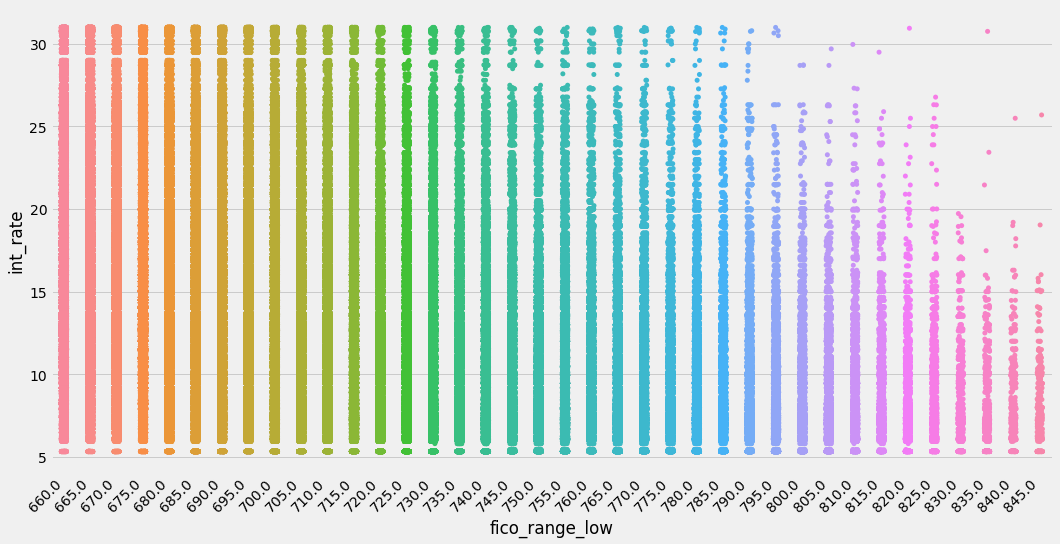

In [65]:
# plot = sns.catplot(x="fico_range_low", y="int_rate", data=df2, kind="swarm", palette=["dodgerblue", "orangered"]);

f, ax = plt.subplots(figsize=(16, 8))
chart = sns.stripplot(x="fico_range_low", y="int_rate",
                linewidth=0,
                data=df_2010, ax=ax)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right'
)